In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from tqdm import tqdm

from atlas_yao import *
from klein_viz_utils import find_closest_theta_phi_brute

Computing brute theta-phi tuples...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 915.61it/s]

Done


In [7]:
data_dir = "data/klein"

Vecs = np.load(data_dir+"/klein_uniform_1000.npy")
#Vecs = np.load(data_dir+"/klein_uniform_100.npy")
patches_pos = np.load(data_dir+"/patches_pos_razor_big.npy")
patches_neg = np.load(data_dir+"/patches_neg_razor_big.npy")

vecs_pos = []
vecs_neg = []
for j in range(patches_pos.shape[0]):
    vecs_pos.append(patches_pos[j, :, :].reshape(9))
    vecs_neg.append(patches_neg[j, :, :].reshape(9))
Vecs_pos = np.vstack(vecs_pos)
Vecs_neg = np.vstack(vecs_neg)

print(Vecs_pos.shape)
print(Vecs_neg.shape)

(1000, 9)
(1000, 9)


In [3]:
# Number of charts inspired by previous notebook
n_charts = 64
km_max_iter = 1000
grid_len = 30

ka = atlas_yao(Vecs, Vecs_pos, Vecs_neg, n_charts,
              km_max_iter=km_max_iter,
              grid_len=grid_len,
              load_dist_mat=True)

Getting graph as sparse matrix...
Done
Getting graph from sparse matrix...
Done
Done
Constructing enormous graph for brute-force geodesic approximation.
Trying eps = 0.6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 41234/41234 [06:09<00:00, 111.55it/s]


In [4]:
# Load in data
n_iters = 10
temp_dir = "temp_save_"+str(n_iters)
names = ["xi_pos_list", "chart_pos_list", "xi_prime_pos_list", "xi_neg_list", "chart_neg_list", "xi_prime_neg_list", "xi_bou_list", "chart_bou_list", "xi_prime_bou_list", "xi_prime_bou_pos_list", "xi_prime_bou_neg_list"]
output = {}
for name in tqdm(names):
    output[name] = np.load(temp_dir+"/"+name+".npy")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 3403.97it/s]


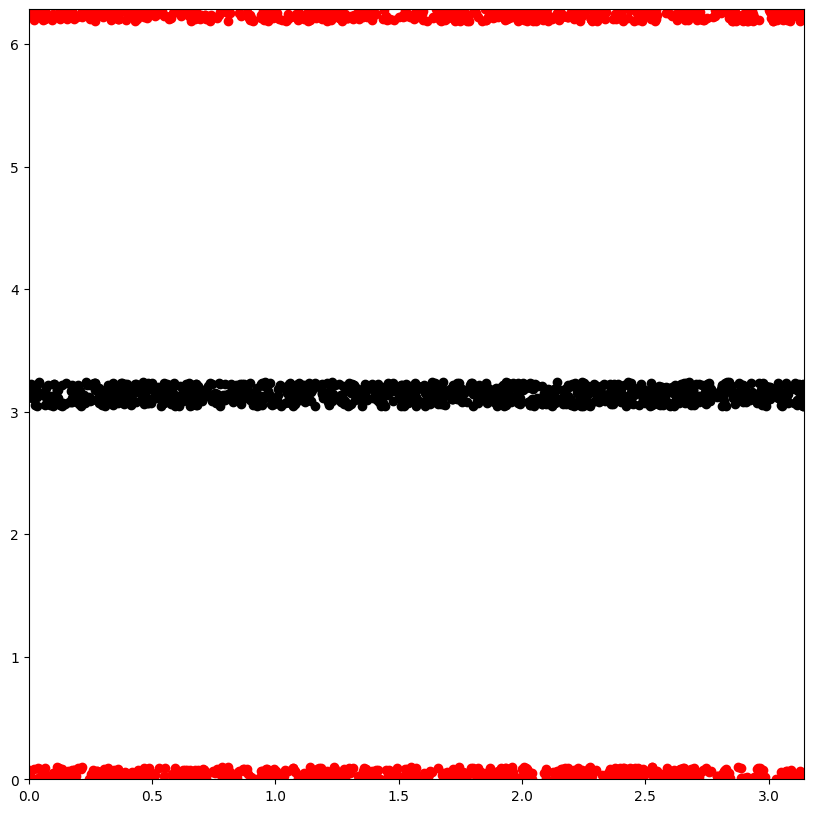

In [8]:
thetas_pos = np.load(data_dir+"/thetas_pos_razor_big.npy")
thetas_neg = np.load(data_dir+"/thetas_neg_razor_big.npy")
phis_pos = np.load(data_dir+"/phis_pos_razor_big.npy")
phis_neg = np.load(data_dir+"/phis_neg_razor_big.npy")

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

ax.scatter(thetas_pos, phis_pos, color="r")
ax.scatter(thetas_neg, phis_neg, color="k")

ax.set_xlim(0, np.pi)
ax.set_ylim(0, 2*np.pi)

plt.show()

<h3>Pos Stuff</h3>

In [9]:
xi_pos_list = output["xi_pos_list"]
chart_pos_list = output["chart_pos_list"]

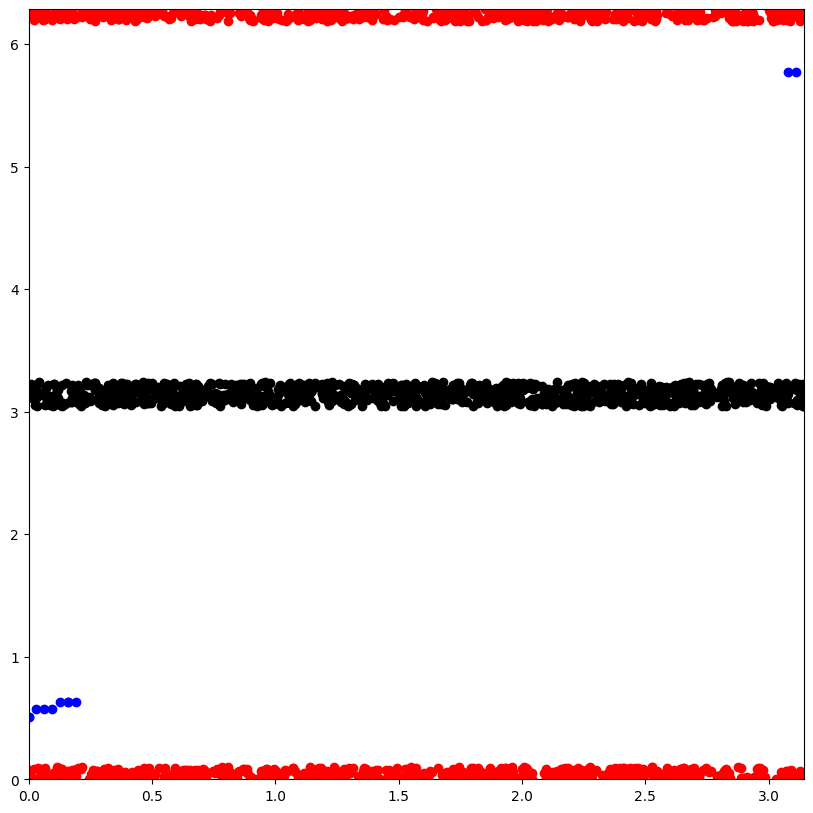

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

ax.scatter(thetas_pos, phis_pos, color="r")
ax.scatter(thetas_neg, phis_neg, color="k")

ax.set_xlim(0, np.pi)
ax.set_ylim(0, 2*np.pi)

theta_pos_list = []
phi_pos_list = []
for xi_pos, chart_pos in zip(xi_pos_list, chart_pos_list):
    x_pos = ka.xi_ind_to_ambient(xi_pos, chart_pos)
    theta_pos, phi_pos = find_closest_theta_phi_brute(x_pos)
    theta_pos_list.append(theta_pos)
    phi_pos_list.append(phi_pos)
    
ax.scatter(theta_pos_list, phi_pos_list, color="b")
    
plt.show()

<h3>Neg Stuff</h3>

In [12]:
xi_neg_list = output["xi_neg_list"]
chart_neg_list = output["chart_neg_list"]

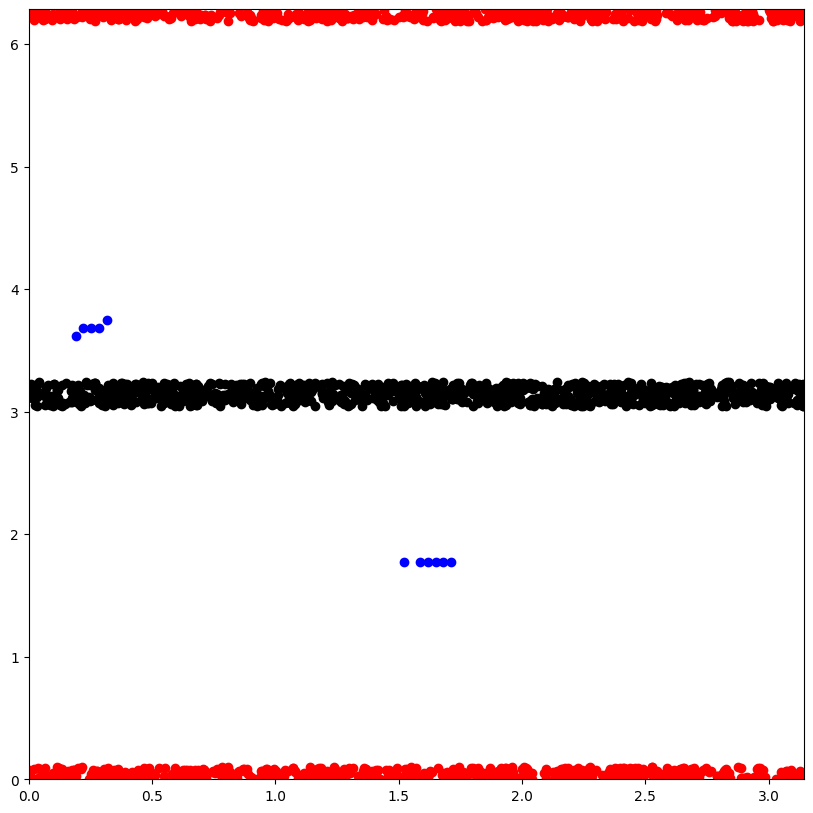

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

ax.scatter(thetas_pos, phis_pos, color="r")
ax.scatter(thetas_neg, phis_neg, color="k")

ax.set_xlim(0, np.pi)
ax.set_ylim(0, 2*np.pi)

theta_neg_list = []
phi_neg_list = []
for xi_neg, chart_neg in zip(xi_neg_list, chart_neg_list):
    x_neg = ka.xi_ind_to_ambient(xi_neg, chart_neg)
    theta_neg, phi_neg = find_closest_theta_phi_brute(x_neg)
    theta_neg_list.append(theta_neg)
    phi_neg_list.append(phi_neg)
    
ax.scatter(theta_neg_list, phi_neg_list, color="b")
    
plt.show()

<h3>Bou Stuff</h3>

In [14]:
xi_bou_list = output["xi_bou_list"]
chart_bou_list = output["chart_bou_list"]

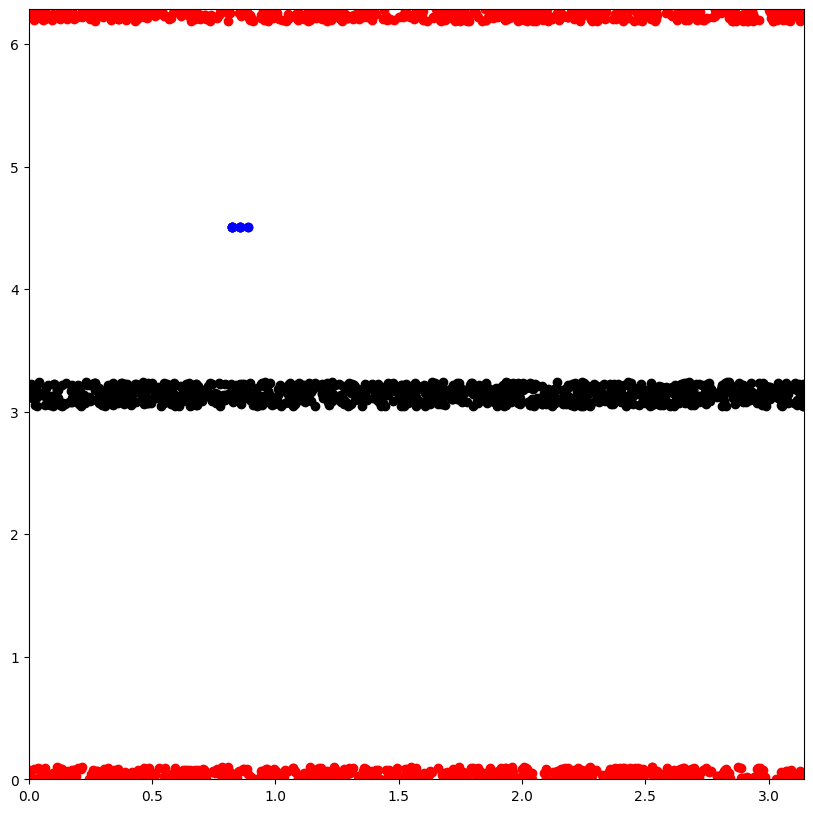

In [15]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

ax.scatter(thetas_pos, phis_pos, color="r")
ax.scatter(thetas_neg, phis_neg, color="k")

ax.set_xlim(0, np.pi)
ax.set_ylim(0, 2*np.pi)

theta_bou_list = []
phi_bou_list = []
for xi_bou, chart_bou in zip(xi_bou_list, chart_bou_list):
    x_bou = ka.xi_ind_to_ambient(xi_bou, chart_bou)
    theta_bou, phi_bou = find_closest_theta_phi_brute(x_bou)
    theta_bou_list.append(theta_bou)
    phi_bou_list.append(phi_bou)
    
ax.scatter(theta_bou_list, phi_bou_list, color="b")
    
plt.show()

In [16]:
# Get initial points for RPB
### Get random positive point
np.random.seed(600)
n_pos = Vecs_pos.shape[0]
ind_pos = np.random.randint(n_pos)
x_pos = Vecs_pos[ind_pos, :]
### Get closest negative point
X_pos = x_pos.reshape((1, 9))
dist_vec = euclidean_distances(X_pos, Vecs_neg)[0, :]
n_neg = Vecs_neg.shape[0]
ind_neg = np.random.randint(n_neg)
x_neg = Vecs_neg[ind_neg, :]

# Ingest x_pos, x_neg into atlas graph coordinates
xi_pos, chart_pos = ka.ingest_ambient_point(x_pos)
xi_neg, chart_neg = ka.ingest_ambient_point(x_neg)

x_pos_re = ka.xi_ind_to_ambient(xi_pos, chart_pos)
x_neg_re = ka.xi_ind_to_ambient(xi_neg, chart_neg)

theta_pos, phi_pos = find_closest_theta_phi_brute(x_pos)
theta_neg, phi_neg = find_closest_theta_phi_brute(x_neg)
theta_pos_re, phi_pos_re = find_closest_theta_phi_brute(x_pos_re)
theta_neg_re, phi_neg_re = find_closest_theta_phi_brute(x_neg_re)

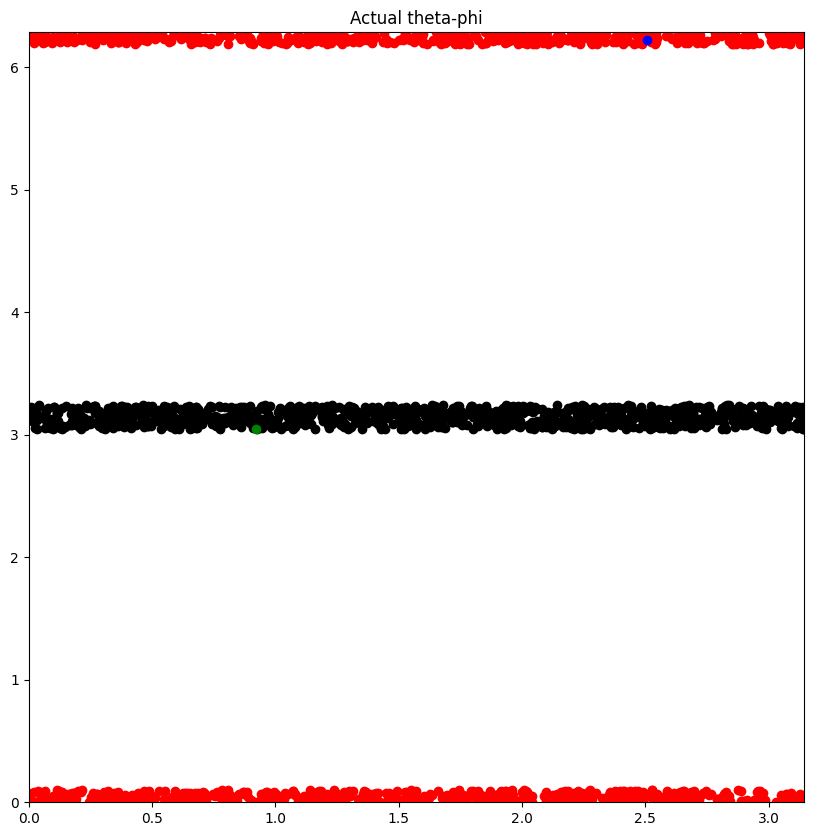

In [17]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

ax.scatter(thetas_pos, phis_pos, color="r")
ax.scatter(thetas_neg, phis_neg, color="k")

ax.set_xlim(0, np.pi)
ax.set_ylim(0, 2*np.pi)

ax.scatter([theta_pos], [phi_pos], color="b")
ax.scatter([theta_neg], [phi_neg], color="g")

ax.set_title("Actual theta-phi")

plt.show()

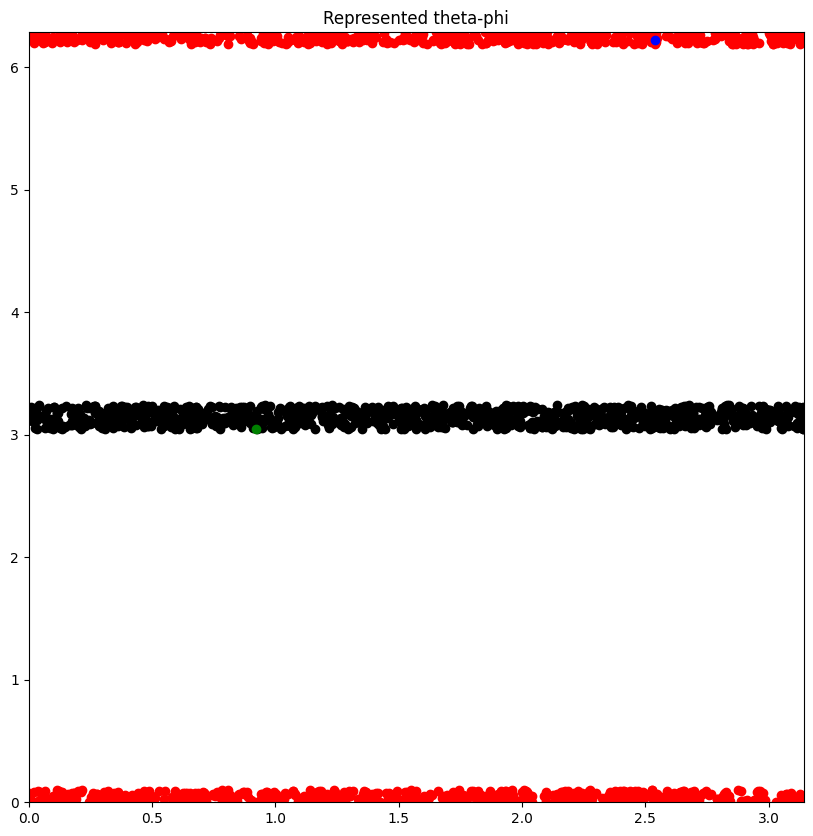

In [19]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

ax.scatter(thetas_pos, phis_pos, color="r")
ax.scatter(thetas_neg, phis_neg, color="k")

ax.set_xlim(0, np.pi)
ax.set_ylim(0, 2*np.pi)

ax.scatter([theta_pos_re], [phi_pos_re], color="b")
ax.scatter([theta_neg_re], [phi_neg_re], color="g")

ax.set_title("Represented theta-phi")

plt.show()